# Overview
After Webscaping the data (see [this notebook](https://colab.research.google.com/drive/1DuTTb6zHpkHlUXn0hgI5vLRo9N8MTErK#scrollTo=njZZksiMpmgR)) we need to clean and explore this data

## Data Cleaning
A number of the columns include both metric and imperical data. This needs to be standardized such that each column reports 1 unit. We will only keep metric units and ensure that columns are of type float. This will then be saved as a new csv file.


In [1]:
# importing the data
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CIS 519/Data/data.csv')
df.head()

In [ ]:
import re

# reformating cols related to temperature and dew point
def remove_fahrenheit(text) :
  return re.sub(r'°C|\s*\(.*?\)', '', text)

cols = df.columns.tolist() # cols 3 - 13 are related to temperature
for i in range(3, 15) :
  df.insert(i, cols[i] + '_C', df[cols[i]].apply(remove_fahrenheit).astype(float))
  df.drop(columns=[cols[i]], inplace=True)

df.head()

,region,year,month,temp_max_C,temp_avg_daily_max_C,temp_min_daily_max_C,temp_max_daily_avg_C,temp_avg_C,temp_min_daily_avg_C,temp_max_daily_min_C,...,snow_depth_sum,wind_max,wind_avg,wind_min,gust_max,gust_avg,gust_min,sea_level_preassure_max,sea_level_preassure_avg,sea_level_preassure_min
0,andaman-and-nicobar-islands,2010,january,28.0,27.55,27.0,28.0,27.42,27.0,28.0,...,0.0mm | 0in,26.0kmh | 16.16mph,17.71kmh | 11.0mph,10.0kmh | 6.21mph,35.0kmh | 21.75mph,24.71kmh | 15.35mph,15.0kmh | 9.32mph,5.3mb,0.9mb,0.0mb
1,andaman-and-nicobar-islands,2010,february,28.0,27.54,26.0,28.0,27.46,26.0,28.0,...,0.0mm | 0in,23.0kmh | 14.29mph,15.68kmh | 9.74mph,7.0kmh | 4.35mph,31.0kmh | 19.26mph,21.68kmh | 13.47mph,10.0kmh | 6.21mph,0.0mb,0.0mb,0.0mb
2,andaman-and-nicobar-islands,2010,march,30.0,28.48,27.0,30.0,28.39,27.0,29.0,...,0.0mm | 0in,19.0kmh | 11.81mph,10.13kmh | 6.29mph,4.0kmh | 2.49mph,27.0kmh | 16.78mph,14.1kmh | 8.76mph,6.0kmh | 3.73mph,1.5mb,0.14mb,0.0mb
3,andaman-and-nicobar-islands,2010,april,30.0,29.73,29.0,30.0,29.67,29.0,30.0,...,0.0mm | 0in,13.0kmh | 8.08mph,7.0kmh | 4.35mph,4.0kmh | 2.49mph,18.0kmh | 11.18mph,9.63kmh | 5.98mph,5.0kmh | 3.11mph,2.5mb,0.42mb,0.0mb
4,andaman-and-nicobar-islands,2010,may,31.0,30.45,30.0,31.0,30.26,30.0,31.0,...,0.0mm | 0in,38.0kmh | 23.61mph,16.35kmh | 10.16mph,3.0kmh | 1.86mph,57.0kmh | 35.42mph,23.52kmh | 14.61mph,4.0kmh | 2.49mph,30.1mb,4.81mb,0.0mb


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   4884 non-null   object 
 1   year                     4884 non-null   int64  
 2   month                    4884 non-null   object 
 3   temp_max_C               4884 non-null   float64
 4   temp_avg_daily_max_C     4884 non-null   float64
 5   temp_min_daily_max_C     4884 non-null   float64
 6   temp_max_daily_avg_C     4884 non-null   float64
 7   temp_avg_C               4884 non-null   float64
 8   temp_min_daily_avg_C     4884 non-null   float64
 9   temp_max_daily_min_C     4884 non-null   float64
 10  temp_avg_daily_min_C     4884 non-null   float64
 11  temp_min_C               4884 non-null   float64
 12  dew_pt_max_C             4884 non-null   float64
 13  dew_pt_avg_C             4884 non-null   float64
 14  dew_pt_min_C            

In [ ]:
# reformating columns related to percipitation and snowfall
def remove_in(text) :
  return re.sub(r'\s*mm\s*\|(.*)', '', text)

cols = df.columns.tolist() # cols 15 - 23 are related to in
for i in range(15, 23) :
  df.insert(i, cols[i] + '_mm', df[cols[i]].apply(remove_in).astype(float))
  df.drop(columns=[cols[i]], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   4884 non-null   object 
 1   year                     4884 non-null   int64  
 2   month                    4884 non-null   object 
 3   temp_max_C               4884 non-null   float64
 4   temp_avg_daily_max_C     4884 non-null   float64
 5   temp_min_daily_max_C     4884 non-null   float64
 6   temp_max_daily_avg_C     4884 non-null   float64
 7   temp_avg_C               4884 non-null   float64
 8   temp_min_daily_avg_C     4884 non-null   float64
 9   temp_max_daily_min_C     4884 non-null   float64
 10  temp_avg_daily_min_C     4884 non-null   float64
 11  temp_min_C               4884 non-null   float64
 12  dew_pt_max_C             4884 non-null   float64
 13  dew_pt_avg_C             4884 non-null   float64
 14  dew_pt_min_C            

In [ ]:
# reformating cols related to wind speed and gust wind speed
def remove_mph(text) :
  return re.sub(r'\s*kmh\s*\|(.*)', '', text)

cols = df.columns.tolist() # cols 15 - 23 are related to in
for i in range(23, 29) :
  df.insert(i, cols[i] + '_kmh', df[cols[i]].apply(remove_mph).astype(float))
  df.drop(columns=[cols[i]], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   4884 non-null   object 
 1   year                     4884 non-null   int64  
 2   month                    4884 non-null   object 
 3   temp_max_C               4884 non-null   float64
 4   temp_avg_daily_max_C     4884 non-null   float64
 5   temp_min_daily_max_C     4884 non-null   float64
 6   temp_max_daily_avg_C     4884 non-null   float64
 7   temp_avg_C               4884 non-null   float64
 8   temp_min_daily_avg_C     4884 non-null   float64
 9   temp_max_daily_min_C     4884 non-null   float64
 10  temp_avg_daily_min_C     4884 non-null   float64
 11  temp_min_C               4884 non-null   float64
 12  dew_pt_max_C             4884 non-null   float64
 13  dew_pt_avg_C             4884 non-null   float64
 14  dew_pt_min_C            

In [ ]:
# Reformating cols related to sea level pressure
def remove_mb(text) :
  return re.sub(r'mb', '', text)

cols = df.columns.tolist() # cols 15 - 23 are related to in
for i in range(29, len(cols)) :
  df.insert(i, cols[i] + '_mb', df[cols[i]].apply(remove_mb).astype(float))
  df.drop(columns=[cols[i]], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region                      4884 non-null   object 
 1   year                        4884 non-null   int64  
 2   month                       4884 non-null   object 
 3   temp_max_C                  4884 non-null   float64
 4   temp_avg_daily_max_C        4884 non-null   float64
 5   temp_min_daily_max_C        4884 non-null   float64
 6   temp_max_daily_avg_C        4884 non-null   float64
 7   temp_avg_C                  4884 non-null   float64
 8   temp_min_daily_avg_C        4884 non-null   float64
 9   temp_max_daily_min_C        4884 non-null   float64
 10  temp_avg_daily_min_C        4884 non-null   float64
 11  temp_min_C                  4884 non-null   float64
 12  dew_pt_max_C                4884 non-null   float64
 13  dew_pt_avg_C                4884 

In [ ]:
df.to_csv('/content/drive/MyDrive/CIS 519/Data/data_clean.csv', index=False)

# EDA
Now that we have a clean dataset we can start exploring the data.

In [2]:
# load the cleaned dataset
df_clean = df = pd.read_csv('/content/drive/MyDrive/CIS 519/Data/data_clean.csv')
df.head()

,region,year,month,temp_max_C,temp_avg_daily_max_C,temp_min_daily_max_C,temp_max_daily_avg_C,temp_avg_C,temp_min_daily_avg_C,temp_max_daily_min_C,...,snow_depth_sum_mm,wind_max_kmh,wind_avg_kmh,wind_min_kmh,gust_max_kmh,gust_avg_kmh,gust_min_kmh,sea_level_preassure_max_mb,sea_level_preassure_avg_mb,sea_level_preassure_min_mb
0,andaman-and-nicobar-islands,2010,january,28.0,27.55,27.0,28.0,27.42,27.0,28.0,...,0.0,26.0,17.71,10.0,35.0,24.71,15.0,5.3,0.90,0.0
1,andaman-and-nicobar-islands,2010,february,28.0,27.54,26.0,28.0,27.46,26.0,28.0,...,0.0,23.0,15.68,7.0,31.0,21.68,10.0,0.0,0.00,0.0
2,andaman-and-nicobar-islands,2010,march,30.0,28.48,27.0,30.0,28.39,27.0,29.0,...,0.0,19.0,10.13,4.0,27.0,14.10,6.0,1.5,0.14,0.0
3,andaman-and-nicobar-islands,2010,april,30.0,29.73,29.0,30.0,29.67,29.0,30.0,...,0.0,13.0,7.00,4.0,18.0,9.63,5.0,2.5,0.42,0.0
4,andaman-and-nicobar-islands,2010,may,31.0,30.45,30.0,31.0,30.26,30.0,31.0,...,0.0,38.0,16.35,3.0,57.0,23.52,4.0,30.1,4.81,0.0


In [ ]:
# we expect 37*12*11 = 4884 rows
df_clean.shape

(4884, 32)

In [ ]:
df_clean.describe()

,year,temp_max_C,temp_avg_daily_max_C,temp_min_daily_max_C,temp_max_daily_avg_C,temp_avg_C,temp_min_daily_avg_C,temp_max_daily_min_C,temp_avg_daily_min_C,temp_min_C,...,snow_depth_sum_mm,wind_max_kmh,wind_avg_kmh,wind_min_kmh,gust_max_kmh,gust_avg_kmh,gust_min_kmh,sea_level_preassure_max_mb,sea_level_preassure_avg_mb,sea_level_preassure_min_mb
count,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,...,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000
mean,2015.000000,32.820639,29.471163,24.994267,29.023137,26.048284,22.459459,22.865684,19.928837,16.749590,...,0.612961,15.560197,9.764505,5.395782,23.373260,14.578542,8.024161,16.218509,2.832230,0.103501
std,3.162601,8.593928,8.432641,8.548734,8.640171,8.718827,8.928792,8.301900,9.126805,10.116855,...,4.837546,8.031085,5.179879,3.259101,11.584755,7.158145,4.495775,28.503750,5.133033,0.663271
min,2010.000000,-15.000000,-19.130000,-31.000000,-20.000000,-26.550000,-35.000000,-26.000000,-33.680000,-45.000000,...,0.000000,3.000000,1.930000,1.000000,6.000000,3.390000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,30.000000,27.367500,22.000000,26.000000,23.190000,19.000000,20.000000,15.900000,12.000000,...,0.000000,10.000000,6.187500,3.000000,15.000000,9.530000,5.000000,1.600000,0.120000,0.000000
50%,2015.000000,33.000000,30.170000,26.000000,30.000000,27.560000,24.000000,24.000000,22.060000,19.000000,...,0.000000,14.000000,8.740000,5.000000,22.000000,13.480000,7.000000,7.700000,0.850000,0.000000
75%,2018.000000,37.000000,33.700000,29.000000,34.000000,30.550000,27.000000,28.000000,25.870000,24.000000,...,0.000000,20.000000,12.102500,7.000000,29.000000,17.840000,10.000000,20.000000,3.360000,0.000000
max,2020.000000,56.000000,46.800000,42.000000,49.000000,43.700000,40.000000,44.000000,37.830000,33.000000,...,134.600000,58.000000,35.730000,26.000000,97.000000,52.770000,37.000000,931.600000,65.770000,15.900000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region                      4884 non-null   object 
 1   year                        4884 non-null   int64  
 2   month                       4884 non-null   object 
 3   temp_max_C                  4884 non-null   float64
 4   temp_avg_daily_max_C        4884 non-null   float64
 5   temp_min_daily_max_C        4884 non-null   float64
 6   temp_max_daily_avg_C        4884 non-null   float64
 7   temp_avg_C                  4884 non-null   float64
 8   temp_min_daily_avg_C        4884 non-null   float64
 9   temp_max_daily_min_C        4884 non-null   float64
 10  temp_avg_daily_min_C        4884 non-null   float64
 11  temp_min_C                  4884 non-null   float64
 12  dew_pt_max_C                4884 non-null   float64
 13  dew_pt_avg_C                4884 

In [ ]:
print(pd.unique(df_clean['region']))
print("There are ", len(pd.unique(df_clean['region'])), " meteorological subdivisions in this dataset.")

['andaman-and-nicobar-islands' 'andhra-pradesh' 'arunachal-pradesh'
 'assam' 'bihar' 'chandigarh' 'chhattisgarh' 'dadra-and-nagar-haveli'
 'daman-and-diu' 'delhi' 'goa' 'gujarat' 'haryana' 'himachal-pradesh'
 'jammu-and-kashmir' 'jharkhand' 'karnataka' 'kerala' 'ladakh'
 'lakshadweep' 'madhya-pradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'puducherry' 'punjab' 'rajasthan' 'sikkim'
 'tamil-nadu' 'telangana' 'tripura' 'uttar-pradesh' 'uttarakhand'
 'west-bengal']
There are  37  meteorological subdivisions in this dataset.


In the original dataset the subdivisions are slightly different. There are 36 subdivisions in the original dataset while our improved dataset has 37. Additionally the regions of the dataset are slightly different (West and East Madhya Pradesh in original dataset vs only Madhya Pradesh in this dataset)

,Total,Percent
region,0,0.0
year,0,0.0
sea_level_preassure_avg_mb,0,0.0
sea_level_preassure_max_mb,0,0.0
gust_min_kmh,0,0.0
gust_avg_kmh,0,0.0
gust_max_kmh,0,0.0
wind_min_kmh,0,0.0
wind_avg_kmh,0,0.0
wind_max_kmh,0,0.0


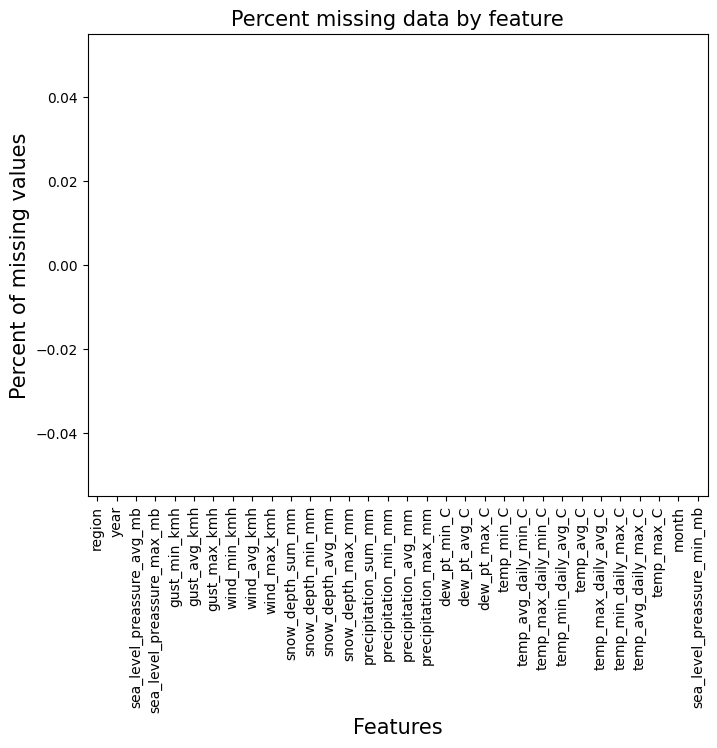

In [ ]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
    ms = ms[ms['Percent']>=0]
    f,ax = plt.subplots(figsize=(8,6))
    plt.xticks(rotation = 'vertical')
    fig =  sns.barplot(ms['Percent'],color = 'green',alpha = 0.8)
    plt.xlabel('Features',fontsize = 15)
    plt.ylabel('Percent of missing values', fontsize = 15)
    plt.title('Percent missing data by feature', fontsize = 15)
    return ms
missingdata(df_clean)

None of our data is null or without a value, which is a very good thing and differnt from the original data set which is missing up to 60% of its data for certain parameters.

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region                      4884 non-null   object 
 1   year                        4884 non-null   int64  
 2   month                       4884 non-null   object 
 3   temp_max_C                  4884 non-null   float64
 4   temp_avg_daily_max_C        4884 non-null   float64
 5   temp_min_daily_max_C        4884 non-null   float64
 6   temp_max_daily_avg_C        4884 non-null   float64
 7   temp_avg_C                  4884 non-null   float64
 8   temp_min_daily_avg_C        4884 non-null   float64
 9   temp_max_daily_min_C        4884 non-null   float64
 10  temp_avg_daily_min_C        4884 non-null   float64
 11  temp_min_C                  4884 non-null   float64
 12  dew_pt_max_C                4884 non-null   float64
 13  dew_pt_avg_C  

,year,temp_max_C,temp_avg_daily_max_C,temp_min_daily_max_C,temp_max_daily_avg_C,temp_avg_C,temp_min_daily_avg_C,temp_max_daily_min_C,temp_avg_daily_min_C,temp_min_C,...,snow_depth_sum_mm,wind_max_kmh,wind_avg_kmh,wind_min_kmh,gust_max_kmh,gust_avg_kmh,gust_min_kmh,sea_level_preassure_max_mb,sea_level_preassure_avg_mb,sea_level_preassure_min_mb
count,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,...,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000
mean,2015.000000,32.820639,29.471163,24.994267,29.023137,26.048284,22.459459,22.865684,19.928837,16.749590,...,0.612961,15.560197,9.764505,5.395782,23.373260,14.578542,8.024161,16.218509,2.832230,0.103501
std,3.162601,8.593928,8.432641,8.548734,8.640171,8.718827,8.928792,8.301900,9.126805,10.116855,...,4.837546,8.031085,5.179879,3.259101,11.584755,7.158145,4.495775,28.503750,5.133033,0.663271
min,2010.000000,-15.000000,-19.130000,-31.000000,-20.000000,-26.550000,-35.000000,-26.000000,-33.680000,-45.000000,...,0.000000,3.000000,1.930000,1.000000,6.000000,3.390000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,30.000000,27.367500,22.000000,26.000000,23.190000,19.000000,20.000000,15.900000,12.000000,...,0.000000,10.000000,6.187500,3.000000,15.000000,9.530000,5.000000,1.600000,0.120000,0.000000
50%,2015.000000,33.000000,30.170000,26.000000,30.000000,27.560000,24.000000,24.000000,22.060000,19.000000,...,0.000000,14.000000,8.740000,5.000000,22.000000,13.480000,7.000000,7.700000,0.850000,0.000000
75%,2018.000000,37.000000,33.700000,29.000000,34.000000,30.550000,27.000000,28.000000,25.870000,24.000000,...,0.000000,20.000000,12.102500,7.000000,29.000000,17.840000,10.000000,20.000000,3.360000,0.000000
max,2020.000000,56.000000,46.800000,42.000000,49.000000,43.700000,40.000000,44.000000,37.830000,33.000000,...,134.600000,58.000000,35.730000,26.000000,97.000000,52.770000,37.000000,931.600000,65.770000,15.900000



Frequency of Unique Values for Categorical Columns:

Frequency of top unique values in region:
region
andaman-and-nicobar-islands    132
lakshadweep                    132
maharashtra                    132
manipur                        132
meghalaya                      132
Name: count, dtype: int64

Frequency of top unique values in month:
month
january     407
february    407
march       407
april       407
may         407
Name: count, dtype: int64


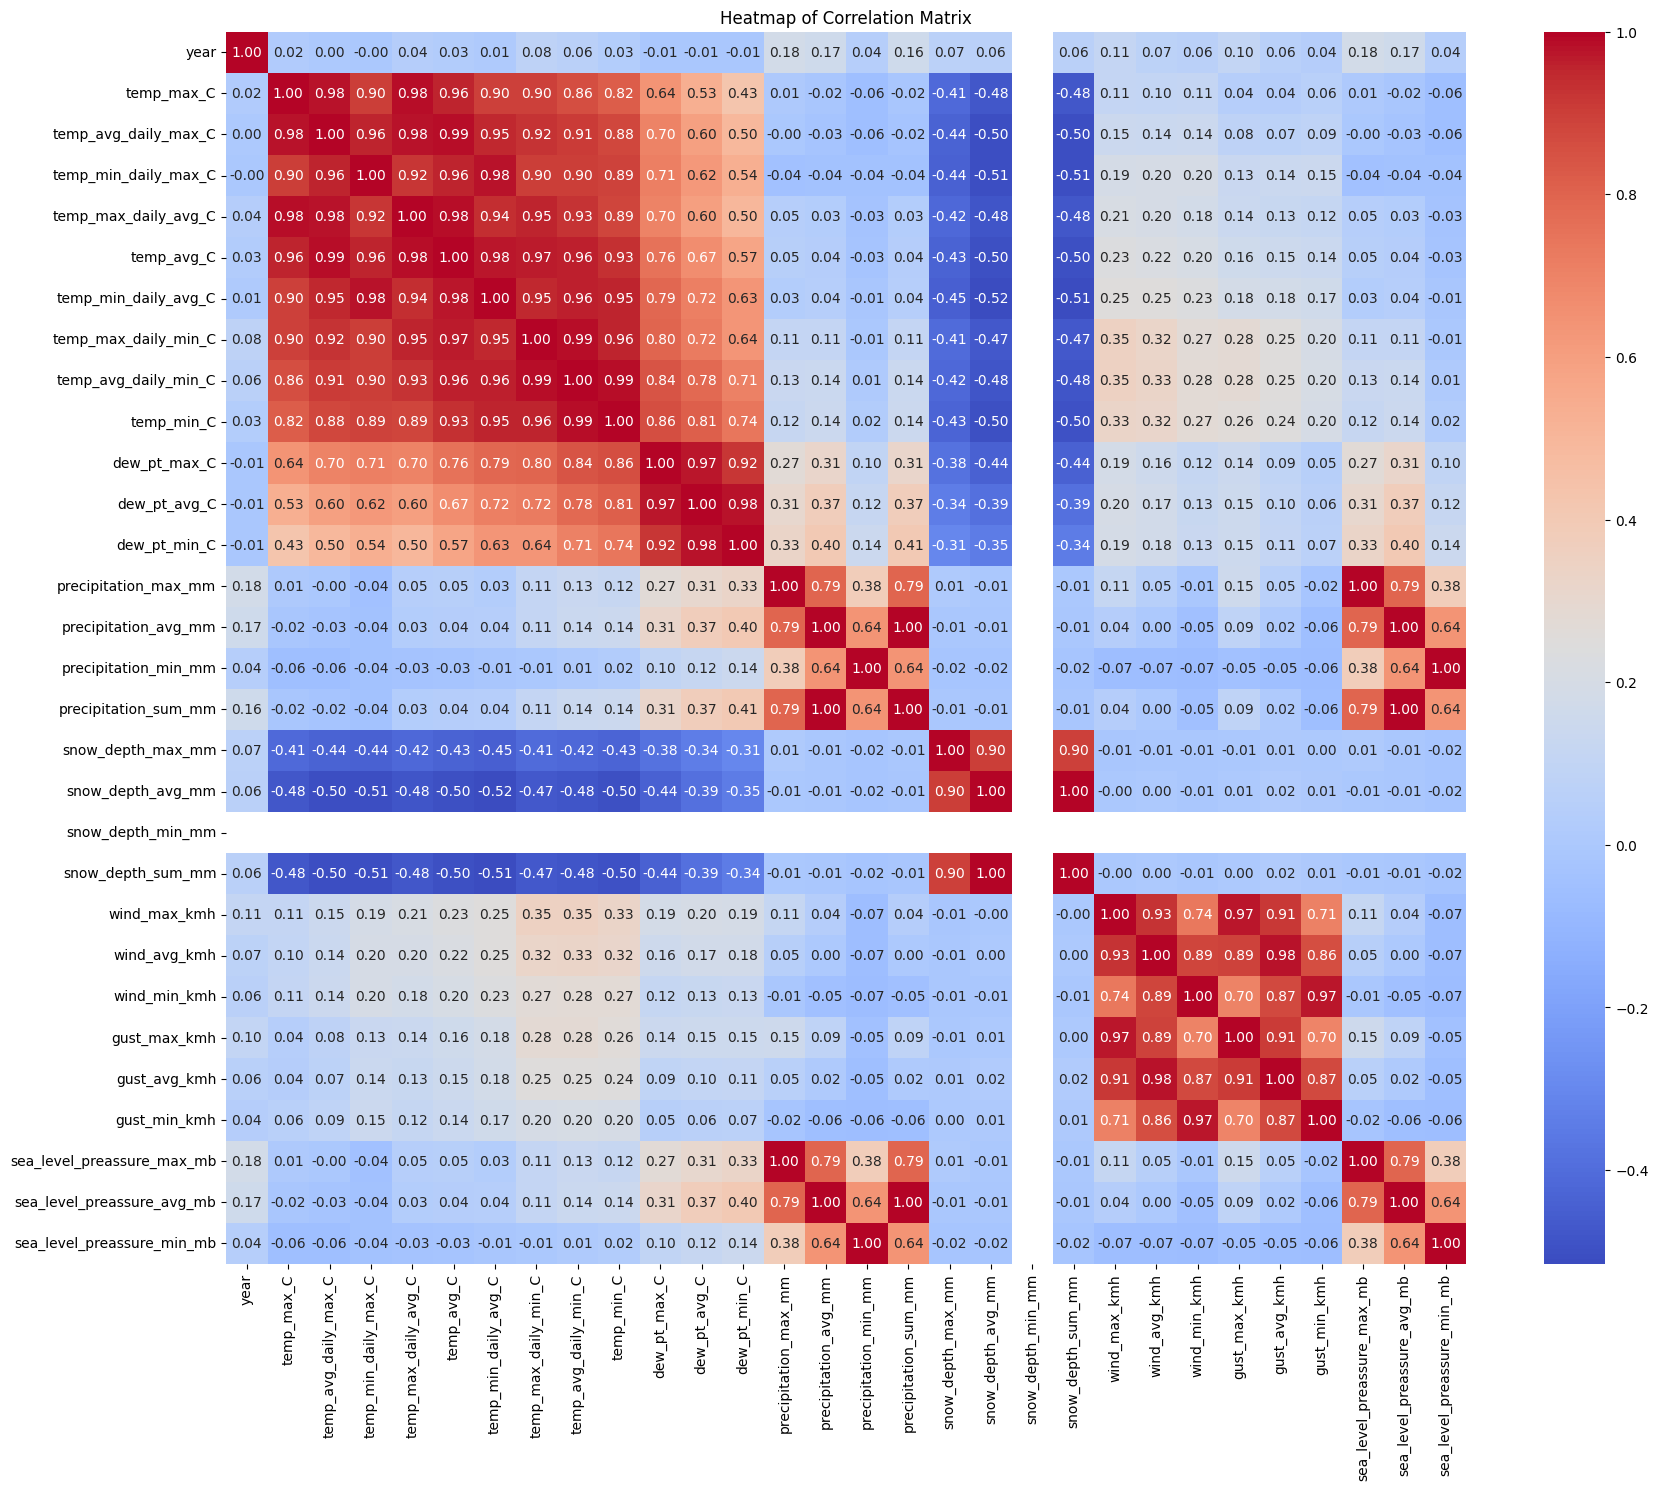

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dataset(df):
    # Display basic information and the shape of the dataset
    print("Basic Information:")
    print(df.info())
    print("\nShape of the dataset:", df.shape)

    # Display unique counts for each column
    print("\nUnique values count:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

    # Summary statistics for numerical columns
    print("\nSummary Statistics for Numeric Columns:")
    display(df.describe())

    # Frequency of unique values for categorical data
    print("\nFrequency of Unique Values for Categorical Columns:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrequency of top unique values in {col}:")
        print(df[col].value_counts().head())

    # Visualizing distributions of numerical features
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # for col in numeric_cols:
    #     plt.figure(figsize=(10, 5))
    #     sns.histplot(df[col].dropna(), kde=True)
    #     plt.title(f'Distribution of {col}')
    #     plt.xlabel(col)
    #     plt.ylabel('Frequency')
    #     plt.show()
    # numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # for col in numeric_cols:
    #     plt.figure(figsize=(10, 5))
    #     if df[col].nunique() < 20:  # If column has fewer unique values, treat as categorical
    #         sns.countplot(x=col, data=df)
    #     else:  # For continuous data, we create bins
    #         bins = np.linspace(df[col].min(), df[col].max(), 20)  # Adjust number of bins as needed
    #         df[col + '_binned'] = pd.cut(df[col], bins=bins, include_lowest=True, labels=[f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)])
    #         sns.countplot(x=col + '_binned', data=df)
    #         plt.xticks(rotation=45)  # Rotate labels for better readability
    #     plt.title(f'Distribution Bar Plot of {col}')
    #     plt.ylabel('Frequency')
    #     plt.show()

    # if len(numeric_cols) > 1:  # Only plot if there are at least two numeric columns
    #   for i in range(len(numeric_cols)):
    #       for j in range(i + 1, len(numeric_cols)):
    #           plt.figure(figsize=(10, 6))
    #           sns.scatterplot(x=numeric_cols[i], y=numeric_cols[j], data=df)
    #           plt.title(f'Scatter Plot between {numeric_cols[i]} and {numeric_cols[j]}')
    #           plt.xlabel(numeric_cols[i])
    #           plt.ylabel(numeric_cols[j])
    #           plt.show()

    # # Visualizing categorical data with a count plot
    # categorical_cols = df.select_dtypes(include=['object']).columns
    # for col in categorical_cols:
    #     if df[col].nunique() < 20:  # To avoid creating too massive plots
    #         plt.figure(figsize=(12, 6))
    #         sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    #         plt.title(f'Count Plot for {col}')
    #         plt.xticks(rotation=45)
    #         plt.show()

    # # Visualizing distributions of numerical features using scatter plots
    # numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # for col in numeric_cols:
    #     plt.figure(figsize=(10, 6))
    #     freq = df[col].value_counts().sort_index()
    #     sns.scatterplot(x=freq.index, y=freq.values)
    #     plt.title(f'Scatter Plot of Frequencies for {col}')
    #     plt.xlabel(col)
    #     plt.ylabel('Frequency')
    #     plt.show()

    # Visualizing the correlation matrix with a heatmap
    if len(numeric_cols) > 1:
        plt.figure(figsize=(20, 16))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title('Heatmap of Correlation Matrix')
        plt.show()

        #sns.clustermap(corr)

analyze_dataset(df_clean)


The correlations that we see are expected. All temperature metrics and dew point metrics (which relates to temperature by definition) are highly correlated. Same with wind and percipitation metrics. Sea level pressure and percipitation are also highly correlated, which also makes sense as sea level preassure is related to moonson and rainfall. Unsurprisingly, snow fall and temperature are inversly correlated, as low temperatures would correlate with snow fall.

<Axes: xlabel='month', ylabel='precipitation_sum_mm'>

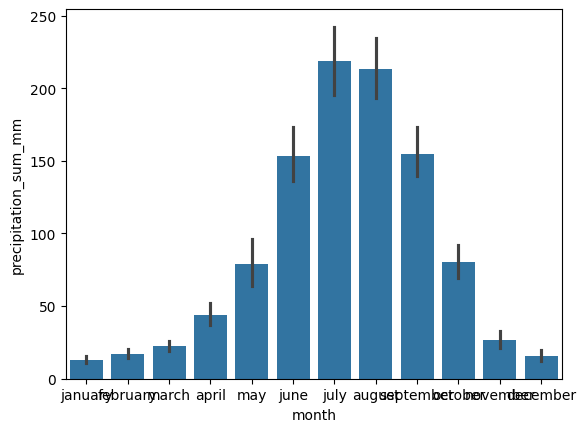

In [ ]:
sns.barplot(data=df_clean, x='month', y='precipitation_sum_mm')

In [11]:
for column in df_clean.columns:
    print(f"{column}")
for column in df_clean.columns:
  print(f" {df_clean[column].dtype}")

region
year
month
temp_max_C
temp_avg_daily_max_C
temp_min_daily_max_C
temp_max_daily_avg_C
temp_avg_C
temp_min_daily_avg_C
temp_max_daily_min_C
temp_avg_daily_min_C
temp_min_C
dew_pt_max_C
dew_pt_avg_C
dew_pt_min_C
precipitation_max_mm
precipitation_avg_mm
precipitation_min_mm
precipitation_sum_mm
snow_depth_max_mm
snow_depth_avg_mm
snow_depth_min_mm
snow_depth_sum_mm
wind_max_kmh
wind_avg_kmh
wind_min_kmh
gust_max_kmh
gust_avg_kmh
gust_min_kmh
sea_level_preassure_max_mb
sea_level_preassure_avg_mb
sea_level_preassure_min_mb
 object
 int64
 object
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
 float64
